In [2]:
import tbapy

tba = tbapy.TBA("gl4GXuoqG8anLUrLo356LIeeQZk15cfSoXF72YT3mYkI38cCoAmReoCSSF4XWccQ")

In [14]:
years = range(1998, 2024)
last = {}
for year in years:
    last[year] = max([int(x[3:]) for x in tba.teams(year=year, keys=True) if int(x[3:]) not in [1771, 2038, 2119, 2415, 2974, *range(9980, 10000)]])
    print(year, last[year])

1998 204
1999 335
2000 545
2001 716
2002 999
2003 1238
2004 1497
2005 1708
2006 1978
2007 2287
2008 2813
2009 3129
2010 3423
2011 3970
2012 4543
2013 5052
2014 5458
2015 5862
2016 6490
2017 7304
2018 7838
2019 8090
2020 8428
2021 8736
2022 9143
2023 9316


In [24]:
import numpy as np
from math import ceil

fit = np.poly1d(np.polyfit(years, list(last.values()), 1))
trendx = range(1998, ceil((fit-10000).roots)+1)
trendy = [fit(x) for x in trendx]

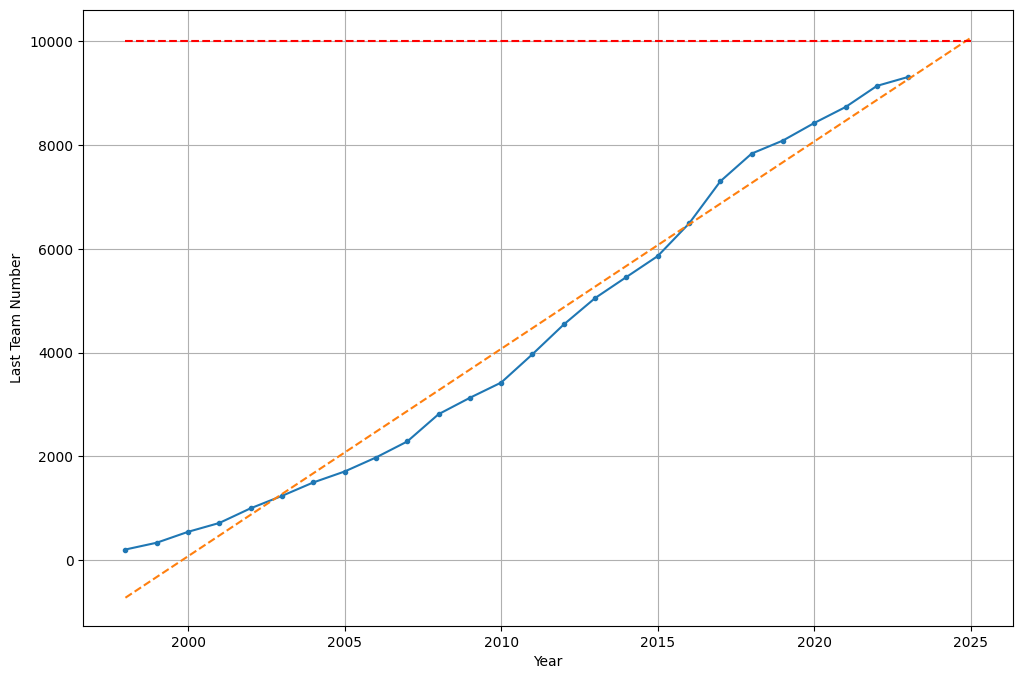

In [26]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(last.keys(), last.values(), '.-')
plt.plot(trendx, trendy, '--')
plt.plot([1998, max(trendx)], [10000, 10000], 'r--')
plt.xlabel("Year")
plt.ylabel("Last Team Number")
plt.grid()